In [2]:
import sys
import os
import requests, json, csv, datetime
import re
import time
from xlwt import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
old1_url_twse = 'https://edition.cnn.com/sitemaps/cnn/news.xml'
old1_res = requests.get(old1_url_twse)
old1_res.encoding = "UTF-8"
old1_soup = BeautifulSoup(old1_res.text)

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [21]:
old1_title_tag = old1_soup.title
print("old1_title_tag:",old1_title_tag)
#print(type(title_tag[0]))
#print("title_tag.string:",title_tag.string)
#print(soup.prettify())
# 所有的超連結
# a_tags = soup.find_all('a')
# for tag in a_tags:
#   # 輸出超連結的文字
#   print(tag.string)
old1_loc_list_o = old1_soup.find_all("loc")
old1_loc_list = []
for l in old1_loc_list_o:
    old1_co = l.contents[0]
    old1_loc_list.append(co)
#print("old1_loc_list:",old1_loc_list)
print(old1_loc_list)

title_tag: None
['https://www.cnn.com/2019/04/05/us/timmothy-pitzen-investigation-friday/index.html', 'https://edition.cnn.com/2019/04/05/uk/theresa-may-brexit-extension-gbr-intl/index.html', 'https://www.cnn.com/style/article/eco-friendly-prison-intl/index.html', 'https://edition.cnn.com/2019/04/05/football/pep-guardiola-manchester-city-copa90-spt-intl/index.html', 'https://edition.cnn.com/2018/04/06/sport/hong-kong-rugby-hsbc-sevens-world-series-fiji-spt-intl/index.html', 'https://edition.cnn.com/2019/04/04/sport/notre-dame-muffet-mcgraw-not-enough-women-in-power/index.html', 'https://www.cnn.com/2019/04/05/tech/samsung-profit-warning-smartphones/index.html', 'https://www.cnn.com/2019/04/05/health/turning-points-helen-costa-giles-weight-loss-workout-mom/index.html', 'https://www.cnn.com/2019/04/05/asia/south-china-sea-duterte-beijing-intl/index.html', 'https://www.cnn.com/2019/04/05/health/japan-okinawa-food-diet-hara-hachi-bu-chasing-life-gupta/index.html', 'https://www.cnn.com/2019

In [48]:
print(old1_soup.prettify())

<html>
 <body>
  <urlset xmlns="http://www.sitemaps.org/schemas/sitemap/0.9" xmlns:image="http://www.google.com/schemas/sitemap-image/1.1" xmlns:news="http://www.google.com/schemas/sitemap-news/0.9" xmlns:xhtml="http://www.w3.org/1999/xhtml">
   <url>
    <loc>
     https://www.cnn.com/2019/04/04/us/gregory-dc-archbishop/index.html
    </loc>
    <news:news>
     <news:publication>
      <news:name>
       CNN
      </news:name>
      <news:language>
       en
      </news:language>
     </news:publication>
     <news:publication_date>
      2019-04-04T17:08:46Z
     </news:publication_date>
     <news:title>
      Pope appoints Washington&amp;apos;s first African-American archbishop
     </news:title>
    </news:news>
    <image:image>
     <image:loc>
      https://cdn.cnn.com/cnnnext/dam/assets/190403214749-archbishop-wilton-gregory-story-top.jpg
     </image:loc>
    </image:image>
   </url>
   <url>
    <loc>
     https://www.cnn.com/2019/04/04/success/mistake-at-work/index.html
 

In [28]:
old1_negative_event_list_dict = {'brexit':[],'theresa-may':[],'trump':[],'wall':[],'trade-war':[],'kim':[],'nuclear-weapon':[],'north-korea':[]}
old1_negative_event_counts_l2 = {'brexit':0,'theresa-may':0,'trump':0,'wall':0,'trade-war':0,'kim':0,'nuclear-weapon':0,'north-korea':0}
for loc in old1_loc_list:
    for g in old1_negative_event_counts_l2:
        if g in loc:
            #negative_event_list_l[g].append(loc)
            old1_negative_event_counts_l2[str(g)] = old1_negative_event_counts_l2[str(g)] + 1
            old1_negative_event_list_dict[str(g)].append(loc)
            #negative_event_counts_l[g] += 1
#print(brexit_counts)
print(old1_negative_event_counts_l2)
print(old1_negative_event_list_dict)




{'brexit': 5, 'theresa-may': 2, 'trump': 31, 'wall': 1, 'trade-war': 0, 'kim': 1, 'nuclear-weapon': 0, 'north-korea': 1}
{'brexit': ['https://edition.cnn.com/2019/04/05/uk/theresa-may-brexit-extension-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/03/uk/brexit-no-deal-bill-yvette-cooper-theresa-may-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/04/uk/brexit-may-signs-of-optimism-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/03/uk/brexit-no-deal-vote-may-corbyn-talks-intl-gbr/index.html', 'https://edition.cnn.com/uk/live-news/brexit-wednesday-gbr-intl/index.html'], 'theresa-may': ['https://edition.cnn.com/2019/04/05/uk/theresa-may-brexit-extension-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/03/uk/brexit-no-deal-bill-yvette-cooper-theresa-may-gbr-intl/index.html'], 'trump': ['https://www.cnn.com/2019/04/04/politics/trump-chinese-xi-trade-summit/index.html', 'https://www.cnn.com/2019/04/04/politics/donald-trump-tax-returns-reasoning/index.html', 'https:

以上爬cnn一般首頁，以下改從sitemaps找

CNN 2019-4 自https://edition.cnn.com/sitemaps/cnn/index.xml，2019~2012各月的文章

In [62]:
cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-2019-04.xml'
cnn_res = requests.get(cnn_url_twse)
cnn_res.encoding = "UTF-8"
cnn_soup = BeautifulSoup(cnn_res.text)
#print(cnn_soup)
cnn_loc_list_o = cnn_soup.find_all("loc")
cnn_loc_list = []
for l in cnn_loc_list_o:
    cn1 = l.contents[0]
    cnn_loc_list.append(cn1)
#print("loc_list:",loc_list)
print(cnn_loc_list)

['https://edition.cnn.com/2019/04/05/football/danny-rose-england-racism-spt-intl/index.html', 'https://edition.cnn.com/2019/04/05/uk/amal-clooney-special-envoy-press-freedoms-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/05/uk/ecuador-assange-embassy-expulsion-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/05/europe/ireland-airbnb-hidden-camera-scli-intl/index.html', 'https://edition.cnn.com/2019/04/04/europe/russia-arctic-kotelny-island-military-base/index.html', 'https://edition.cnn.com/2019/04/05/uk/theresa-may-brexit-extension-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/05/motorsport/how-to-drive-an-electric-race-car-sebastien-buemi-formula-e-spt-intl/index.html', 'https://edition.cnn.com/2019/04/04/sport/notre-dame-muffet-mcgraw-not-enough-women-in-power/index.html', 'https://edition.cnn.com/2019/04/05/football/pep-guardiola-manchester-city-copa90-spt-intl/index.html', 'https://edition.cnn.com/2019/04/05/football/liverpool-southampton-english-premier-le

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [61]:
#計算事件數
# cn4_brexit_list = []
# cn4_theresa_may_list = []
# cn4_trump_list = []
# cn4_wall_list = []
# cn4_trade_war_list = []
# cn4_kim_list = []
# cn4_nuclear_weapon_list = []
# cn4_north_korea_list = []
# cn4_brexit_counts = 0
# cn4_theresa_may_counts = 0
# cn4_trump_counts = 0
# cn4_wall_counts = 0
# cn4_trade_war_counts = 0
# cn4_kim_counts = 0
# cn4_nuclear_weapon_counts = 0
# cn4_north_korea_counts = 0
cn4_negative_event_list_dict = {'brexit':[],'theresa-may':[],'trump':[],'wall':[],'trade-war':[],'kim':[],'nuclear-weapon':[],'north-korea':[]}
cn4_negative_event_counts_l = [brexit_counts,theresa_may_counts,trump_counts,wall_counts,trade_war_counts,kim_counts,nuclear_weapon_counts,north_korea_counts]
cn4_negative_event_counts_l2 = {'brexit':0,'theresa-may':0,'trump':0,'wall':0,'trade-war':0,'kim':0,'nuclear-weapon':0,'north-korea':0}
for loc in cnn_loc_list:
    for g in cn4_negative_event_counts_l2:
        if g in loc:
            #negative_event_list_l[g].append(loc)
            cn4_negative_event_counts_l2[str(g)] = cn4_negative_event_counts_l2[str(g)] + 1
            cn4_negative_event_list_dict[str(g)].append(loc)
            #negative_event_counts_l[g] += 1
#print(brexit_counts)
print(cn4_negative_event_counts_l2)
print(cn4_negative_event_list_dict)



{'brexit': 14, 'theresa-may': 6, 'trump': 0, 'wall': 0, 'trade-war': 0, 'kim': 0, 'nuclear-weapon': 0, 'north-korea': 0}
{'brexit': ['https://edition.cnn.com/2019/04/05/uk/theresa-may-brexit-extension-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/03/uk/brexit-no-deal-bill-yvette-cooper-theresa-may-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/04/uk/brexit-may-signs-of-optimism-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/03/uk/brexit-no-deal-vote-may-corbyn-talks-intl-gbr/index.html', 'https://edition.cnn.com/uk/live-news/brexit-wednesday-gbr-intl/index.html', 'https://edition.cnn.com/uk/live-news/brexit-tuesday-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/02/uk/theresa-may-brexit-statement-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/01/uk/brexit-luke-mcgee-analysis-intl-gbr/index.html', 'https://edition.cnn.com/uk/live-news/brexit-indicative-votes-monday-gbr-intl/index.html', 'https://edition.cnn.com/2019/04/02/uk/brexit-theresa-may-par

以下為cnn從2016/01~2018/12的新聞標題網址，以loc_list儲存

In [2]:
import sys
import os
import requests, json, csv, datetime
import re
import time
from xlwt import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
cnn_loc_list = []
year_count_list = ["2016",'2017','2018']
month_count_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
spe_2019_month_count_list = ['01','02','03','04']
day_count_list = []
for year in year_count_list:
    for month in month_count_list:
        cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-'+year+'-'+month+'.xml'
        cnn_res = requests.get(cnn_url_twse)
        cnn_res.encoding = "UTF-8"
        cnn_soup = BeautifulSoup(cnn_res.text)
        #print(cnn_soup)
        cnn_loc_list_o = cnn_soup.find_all("loc")
        for l in cnn_loc_list_o:
            cn1 = l.contents[0]
            cnn_loc_list.append(cn1)

for mon in spe_2019_month_count_list:
    cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-2019-'+mon+'.xml'
    cnn_res = requests.get(cnn_url_twse)
    cnn_res.encoding = "UTF-8"
    cnn_soup = BeautifulSoup(cnn_res.text)
    #print(cnn_soup)
    cnn_loc_list_o = cnn_soup.find_all("loc")
    for l in cnn_loc_list_o:
        cn1 = l.contents[0]
        cnn_loc_list.append(cn1)
print(year,cnn_loc_list)

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


2018 ['https://edition.cnn.com/2016/01/31/football/john-terry-chelsea-football/index.html', 'https://edition.cnn.com/2016/01/31/sport/sonny-bill-williams-wellington-sevens-rugby/index.html', 'https://edition.cnn.com/2016/01/31/europe/sweden-immigrant-attacks-dover/index.html', 'https://edition.cnn.com/2016/01/31/tennis/australian-open-tennis-djokovic-murray/index.html', 'https://edition.cnn.com/2016/01/31/sport/hawaii-waimea-surf-wipeout/index.html', 'https://edition.cnn.com/2016/01/30/football/football-barcelona-atletico-messi-suarez/index.html', 'https://edition.cnn.com/2016/01/30/europe/italy-same-sex-marriage-debate/index.html', 'https://edition.cnn.com/2016/01/30/europe/italy-mafia-arrests/index.html', 'https://edition.cnn.com/2016/01/30/tennis/australian-open-tennis-serena-williams-angelique-kerber/index.html', 'https://edition.cnn.com/2016/01/30/sport/rugby-sevens-sonny-bill-williams/index.html', 'https://edition.cnn.com/2016/01/29/europe/putin-ex-wife-marries/index.html', 'http

following code
to build a negative_event_list_day_dict: 
a nested dictionary : dict = {'y1/m1/d1':{event1:[],event2:[]},'y2/m2/d2':{event1:[],event2:[]}}
to build a negative_event_counts_day_dict: 
a nested dictionary : dict = {'y1/m1/d1':{event1:0,event2:0},'y2/m2/d2':{event1:0,event2:0}}

{'brexit': [], 'theresa-may': [], 'trump': [], 'wall': [], 'trade-war': [], 'kim': [], 'nuclear-weapon': [], 'north-korea': []}

{'brexit': 0, 'theresa-may': 0, 'trump': 0, 'wall': 0, 'trade-war': 0, 'kim': 0, 'nuclear-weapon': 0, 'north-korea': 0}

In [4]:
import datetime
today = datetime.date.today()
date_list = []
for i in range(1,1080):
    date = today - datetime.timedelta(days=i)
    date = date.strftime("%Y-%m-%d %H:%M:%S")
    str_date = date[0]+date[1]+date[2]+date[3]+"/"+date[5]+date[6]+"/"+date[8]+date[9]
    date_list.append(str_date)
print(str_date)
event_list_day_dict = {}
negative_event_list_day_dict = {}
negative_event_counts_day_dict = {}
total_negative_counts_day_dict = {}
for j in range(1079):
    event_list_day_dict[str(date_list[j])] = []
    negative_event_list_day_dict[str(date_list[j])] = {'brexit':[],'theresa-may':[],'trump':[],'wall':[],'trade-war':[],'kim':[],'nuclear-weapon':[],'north-korea':[]}
    negative_event_counts_day_dict[str(date_list[j])] = {'brexit':0,'theresa-may':0,'trump':0,'wall':0,'trade-war':0,'kim':0,'nuclear-weapon':0,'north-korea':0}
    total_negative_counts_day_dict[str(date_list[j])] = 0
# print(negative_event_list_day_dict)
# print(negative_event_counts_day_dict)
# print(event_list_day_dict[str(date_list[422])])
print(total_negative_counts_day_dict)

2016/04/23
{'2019/04/06': 0, '2019/04/05': 0, '2019/04/04': 0, '2019/04/03': 0, '2019/04/02': 0, '2019/04/01': 0, '2019/03/31': 0, '2019/03/30': 0, '2019/03/29': 0, '2019/03/28': 0, '2019/03/27': 0, '2019/03/26': 0, '2019/03/25': 0, '2019/03/24': 0, '2019/03/23': 0, '2019/03/22': 0, '2019/03/21': 0, '2019/03/20': 0, '2019/03/19': 0, '2019/03/18': 0, '2019/03/17': 0, '2019/03/16': 0, '2019/03/15': 0, '2019/03/14': 0, '2019/03/13': 0, '2019/03/12': 0, '2019/03/11': 0, '2019/03/10': 0, '2019/03/09': 0, '2019/03/08': 0, '2019/03/07': 0, '2019/03/06': 0, '2019/03/05': 0, '2019/03/04': 0, '2019/03/03': 0, '2019/03/02': 0, '2019/03/01': 0, '2019/02/28': 0, '2019/02/27': 0, '2019/02/26': 0, '2019/02/25': 0, '2019/02/24': 0, '2019/02/23': 0, '2019/02/22': 0, '2019/02/21': 0, '2019/02/20': 0, '2019/02/19': 0, '2019/02/18': 0, '2019/02/17': 0, '2019/02/16': 0, '2019/02/15': 0, '2019/02/14': 0, '2019/02/13': 0, '2019/02/12': 0, '2019/02/11': 0, '2019/02/10': 0, '2019/02/09': 0, '2019/02/08': 0, '2

In [5]:
#print(cnn_loc_list)
#將標題依照日期放入 event_list_day_dict
for loc in cnn_loc_list:
    for f in range(1079):
        if str(date_list[f]) in loc:
             event_list_day_dict[str(date_list[f])].append(loc)
#print(event_list_day_dict)
f = -1
for day in range(1079):
    f += 1
    for ev_li in event_list_day_dict[str(date_list[f])]:
        for s in negative_event_list_day_dict[str(date_list[f])]:
            if s in ev_li:
                negative_event_list_day_dict[str(date_list[f])][s].append(ev_li)
                negative_event_counts_day_dict[str(date_list[f])][s] += 1
                total_negative_counts_day_dict[str(date_list[f])] += 1
print(negative_event_list_day_dict[str(date_list[0])])
print(negative_event_counts_day_dict[str(date_list[0])])
print("total_negative_counts:     ",total_negative_counts_day_dict[str(date_list[0])])

{'brexit': ['https://edition.cnn.com/2019/04/06/uk/europe-brexit-analysis-gbr-intl/index.html'], 'theresa-may': [], 'trump': [], 'wall': [], 'trade-war': [], 'kim': [], 'nuclear-weapon': [], 'north-korea': []}
{'brexit': 1, 'theresa-may': 0, 'trump': 0, 'wall': 0, 'trade-war': 0, 'kim': 0, 'nuclear-weapon': 0, 'north-korea': 0}
total_negative_counts:      1


完成2016~2019政治新聞蒐集、整理，以下準備作圖，顯示各事件討論時間軸

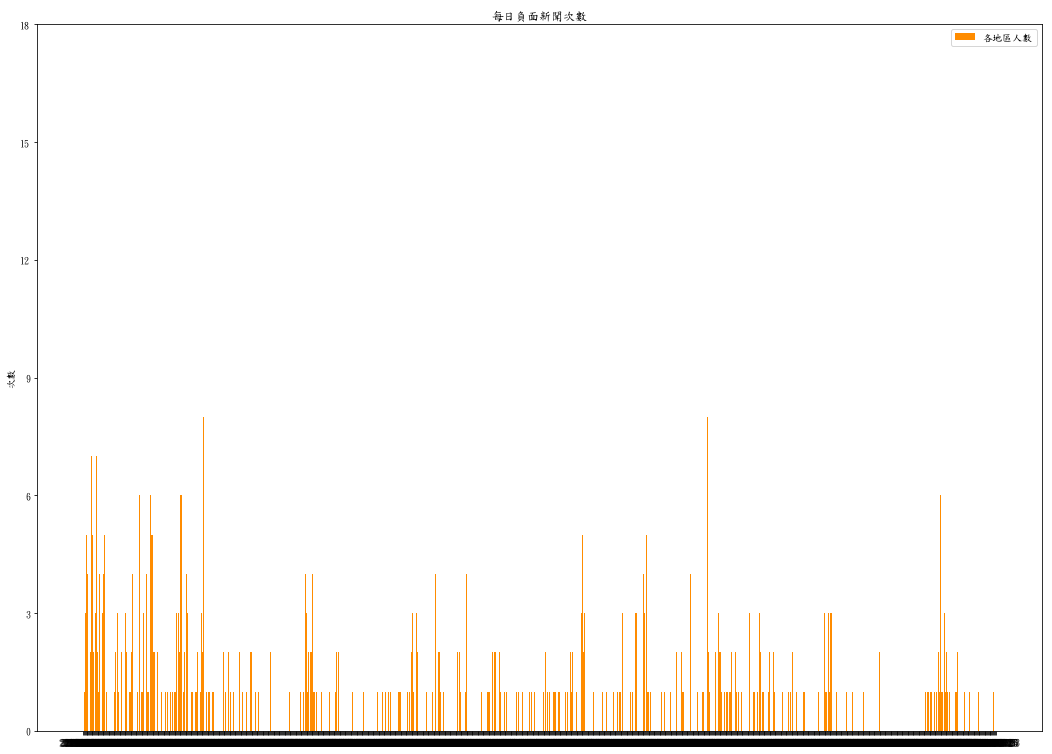

In [8]:
import xlrd
import xlwt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.subplots(figsize=(18,13)) #圖形大小
x_year_count_list = ["2016",'2017','2018']
x_month_count_list = ['04','08','12']
x_day_count_list = []
for year in x_year_count_list:
    for month in x_month_count_list:
        x_day_count_list.append(str(year+"/"+month))
#ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
# ax2 = plt.subplot(3,2,2)
# ax3 = plt.subplot(3,2,3)
# ax4 = plt.subplot(3,2,4)
# ax5 = plt.subplot(3,2,5)
# ax6 = plt.subplot(3,2,6)
#选择ax1
#plt.sca(ax1)
total_negative_counts_date = [*total_negative_counts_day_dict] #抓出tw dict的keys
#print(total_negative_counts_date)
plt.bar(total_negative_counts_date, list(total_negative_counts_day_dict.values()),color = 'darkorange', label='各地區人數')
plt.legend(loc='lower left')
plt.ylabel('次數')
plt.title("每日負面新聞次數")
yaxis = np.arange(0,20,3)
#plt.ylim(0,20)
plt.yticks(yaxis)
#plt.xticks(pd.date_range(start='2016/04/22',end='2019/04/06',freq='M'),rotation=90)
plt.legend()
plt.show()

In [17]:
!pip install pandas

以下換爬cnbc

In [55]:
cnbc_url_twse = 'https://www.cnbc.com/world/?region=world'
cnbc_res = requests.get(cnbc_url_twse)
cnbc_res.encoding = "UTF-8"
cnbc_soup = BeautifulSoup(cnbc_res.text)
cnbc_title_tag = cnbc_soup.title
print("title_tag:",cnbc_title_tag)
# 所有的超連結
cnbc_a_list_o = cnbc_soup.find_all("a")
cnbc_a_list = []
# for m in cnbc_a_list_o:
#     c1 = m.contents[0]
#     cnbc_a_list.append(c1)
# print("cnbc_a_list_o:",cnbc_a_list_o)
for link in cnbc_soup.find_all('a'):
    if "2019" in str(link):
        if str(link.get('href')) not in cnbc_a_list:
            cnbc_a_list.append(str(link.get('href')))
            print(link.get('href'))
print("cnbc_a_list:",cnbc_a_list)
# print(soup.prettify())

title_tag: <title data-react-helmet="true" itemprop="name">International: Top News And Analysis</title>
https://www.cnbc.com/2019/04/05/theresa-may-reaches-out-to-jeremy-corbyn-in-bid-to-fix-brexit-deal.html
https://www.cnbc.com/2019/04/05/ecb-should-not-worry-about-ultra-low-interest-rates-nomuras-koo-says.html
https://www.cnbc.com/2019/04/05/us-china-trade-new-consensus-reached-says-chinas-liu-he.html
https://www.cnbc.com/2019/04/05/nonfarm-payrolls-march-2019.html
https://www.cnbc.com/2019/04/05/jim-oneill-says-his-fears-over-china-are-at-a-30-year-high.html
https://www.cnbc.com/2019/04/05/european-council-donald-tusk-seeks-flexible-brexit-extension-report.html
https://www.cnbc.com/2019/04/05/gender-pay-gap-widens-at-almost-half-of-uk-firms.html
https://www.cnbc.com/2019/04/05/italy-faces-a-worrying-situation-with-no-ideas-for-the-future-former-leader-warns.html
https://www.cnbc.com/2019/04/05/wrestlemania-history-beckons-for-wwes-biggest-female-stars.html
https://www.cnbc.com/2019/

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [56]:
#計算事件數
cnbc_brexit_list = []
cnbc_theresa_may_list = []
cnbc_trump_list = []
cnbc_wall_list = []
cnbc_trade_war_list = []
cnbc_kim_list = []
cnbc_nuclear_weapon_list = []
cnbc_north_korea_list = []
cnbc_brexit_counts = 0
cnbc_theresa_may_counts = 0
cnbc_trump_counts = 0
cnbc_wall_counts = 0
cnbc_trade_war_counts = 0
cnbc_kim_counts = 0
cnbc_nuclear_weapon_counts = 0
cnbc_north_korea_counts = 0
cnbc_negative_event_list_dict = {'brexit':[],'theresa-may':[],'trump':[],'wall':[],'trade-war':[],'kim':[],'nuclear-weapon':[],'north-korea':[]}
cnbc_negative_event_counts_l = [brexit_counts,theresa_may_counts,trump_counts,wall_counts,trade_war_counts,kim_counts,nuclear_weapon_counts,north_korea_counts]
cnbc_negative_event_counts_l2 = {'brexit':0,'theresa-may':0,'trump':0,'wall':0,'trade-war':0,'kim':0,'nuclear-weapon':0,'north-korea':0}
for cnbc_a in cnbc_a_list:
    for g in cnbc_negative_event_counts_l2:
        if g in cnbc_a:
            #negative_event_list_l[g].append(loc)
            cnbc_negative_event_counts_l2[str(g)] = cnbc_negative_event_counts_l2[str(g)] + 1
            cnbc_negative_event_list_dict[str(g)].append(cnbc_a)
            #negative_event_counts_l[g] += 1
#print(brexit_counts)
print(cnbc_negative_event_counts_l2)
print(cnbc_negative_event_list_dict)


{'brexit': 5, 'theresa-may': 1, 'trump': 1, 'wall': 2, 'trade-war': 2, 'kim': 0, 'nuclear-weapon': 0, 'north-korea': 0}
{'brexit': ['https://www.cnbc.com/2019/04/05/theresa-may-reaches-out-to-jeremy-corbyn-in-bid-to-fix-brexit-deal.html', 'https://www.cnbc.com/2019/04/05/european-council-donald-tusk-seeks-flexible-brexit-extension-report.html', 'https://www.cnbc.com/video/2019/04/05/eu-council-will-make-decision-over-brexit-delay-next-week-austrian-finance-minister-says.html', 'https://www.cnbc.com/video/2019/04/05/brexit-bad-news-for-netherlands-uk-and-eu-dutch-finance-minister.html', 'https://www.cnbc.com/video/2019/04/05/brexit-plus-is-the-future-of-europe-former-italian-leader-says.html'], 'theresa-may': ['https://www.cnbc.com/2019/04/05/theresa-may-reaches-out-to-jeremy-corbyn-in-bid-to-fix-brexit-deal.html'], 'trump': ['https://www.cnbc.com/2019/04/05/70percent-of-wall-street-thinks-trump-will-be-reelected-in-2020.html'], 'wall': ['https://www.cnbc.com/2019/04/04/stock-market-wal